## Scatterplot: count versus grit

In [1]:
import pandas as pd
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
BaseDir = '/Users/chririn/Documents/Data/colo44/results/'

In [11]:
# Load viabilty data
dfViability = pd.read_csv("{}/viability_scores.csv".format(BaseDir), sep=";", index_col=0)
dfViability.head()
# Load grit data

dfGrit = pd.read_csv("{}/grit_scores.csv".format(BaseDir), sep=";", index_col=0)
#dfGrit.head()

In [12]:
dfViability['perturbation'] = dfViability.compound + '_' + list(map(str, dfViability.index))

In [13]:
df = dfViability.merge(dfGrit, on='perturbation', how='outer')

In [14]:
dfDMSO = df[df.compound_x.isin(['[dmso]'])]
norm = dfDMSO[['Count_nuclei', 'ObjectNumber_cells']].mean()

In [15]:
df['Count_nuclei_norm'] = (df['Count_nuclei'] / norm[0])*100
df['ObjectNumber_cells_norm'] = (df['ObjectNumber_cells'] / norm[1])*100

#### TODO
1) normalize count_nuclei and object_count_number by DMSO
2) generate the scatterplots 
3) color-code by concentration 

Text(0, 0.5, 'Cell Viability - count nuclei')

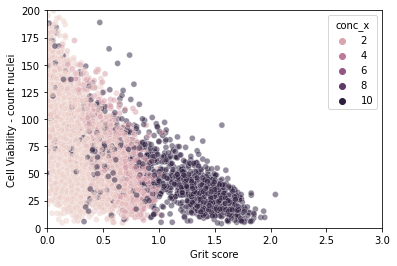

In [16]:
sns.scatterplot(x=df['grit'], y=df['Count_nuclei_norm'], hue=df['conc_x'], alpha=0.5)
plt.xlim([0, 3])
plt.ylim([0, 200])
plt.xlabel('Grit score')
plt.ylabel('Cell Viability - count nuclei')

Text(0, 0.5, 'Cell Viability - count cells')

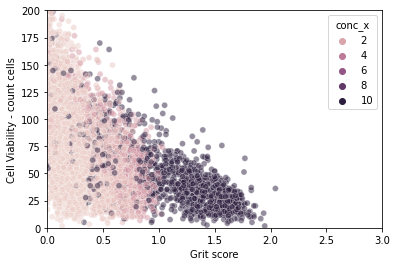

In [17]:
sns.scatterplot(x=df['grit'], y=df['ObjectNumber_cells_norm'], hue=df['conc_x'], alpha=0.5)
plt.xlim([0, 3])
plt.ylim([0, 200])
plt.xlabel('Grit score')
plt.ylabel('Cell Viability - count cells')

#plt.annotate('some value', (1.6,130))

In [11]:
df.loc[(df['Count_nuclei_norm'] > 90) & (df['grit'] > 1.4)]

,conc_x,compound_x,cbkid,site,plateWell,Count_nuclei,ObjectNumber_cells,perturbation,group,grit,compound_y,conc_y,Count_nuclei_norm,ObjectNumber_cells_norm
10410,10.0,LY2603,LY2603618,6,colo44-v1-FA-P017368-CACO2-48h-P2-L2_N13,148.0,45.0,LY2603_10410,10.0,1.564107,LY2603,10.0,94.431685,75.709874


## Variabilty of DMSO

In [12]:
dfDMSO['plate'] = dfDMSO['plateWell'].str[:36]

listOfPlates = dfDMSO['plateWell'].str[:36].unique()

for i in range(len(listOfPlates)):
    dfDMSO.loc[dfDMSO['plate'] == listOfPlates[i], 'plateNo'] = i


/var/folders/bx/43bwk4n57dj9446w1ddn_7t40000gn/T/ipykernel_4955/1326397972.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfDMSO['plate'] = dfDMSO['plateWell'].str[:36]
/var/folders/bx/43bwk4n57dj9446w1ddn_7t40000gn/T/ipykernel_4955/1326397972.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfDMSO.loc[dfDMSO['plate'] == listOfPlates[i], 'plateNo'] = i


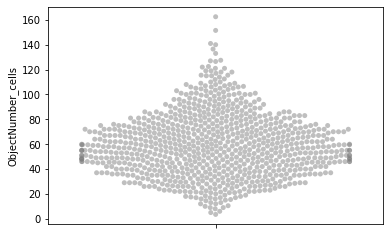

In [13]:
sns.swarmplot(y=dfDMSO["ObjectNumber_cells"], alpha=0.5, color='gray')
plt.show()

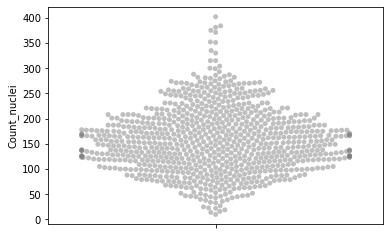

In [14]:
sns.swarmplot(y=dfDMSO["Count_nuclei"], alpha=0.5, color='gray')
plt.show()

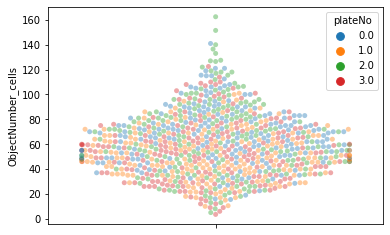

In [15]:
sns.swarmplot(y=dfDMSO["ObjectNumber_cells"], x=['']*len(dfDMSO), alpha=0.4, hue=dfDMSO["plateNo"])
plt.show()


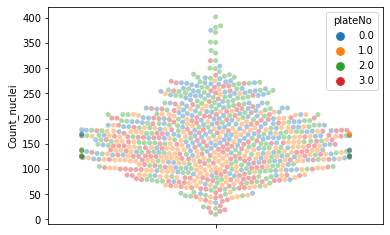

In [16]:
sns.swarmplot(y=dfDMSO["Count_nuclei"], x=['']*len(dfDMSO), alpha=0.4, hue=dfDMSO["plateNo"])
plt.show()

### Variability after averaging

In [25]:
dfDMSO_mean = dfDMSO.groupby('plateWell')[['Count_nuclei', 'ObjectNumber_cells']].mean()
dfDMSO_mean.head()

,Count_nuclei,ObjectNumber_cells
plateWell,,
colo44-v1-FA-P017365-CACO2-48h-P1-L1_B05,185.571429,73.428571
colo44-v1-FA-P017365-CACO2-48h-P1-L1_B23,181.333333,68.000000
colo44-v1-FA-P017365-CACO2-48h-P1-L1_C07,168.000000,68.166667
colo44-v1-FA-P017365-CACO2-48h-P1-L1_C13,150.625000,56.312500
colo44-v1-FA-P017365-CACO2-48h-P1-L1_D15,193.666667,75.722222


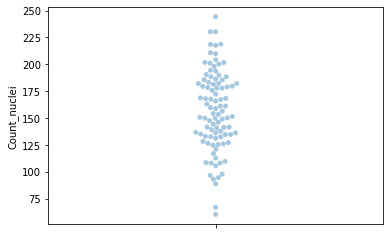

In [26]:
sns.swarmplot(y=dfDMSO_mean["Count_nuclei"], x=['']*len(dfDMSO_mean), alpha=0.4)
plt.show()

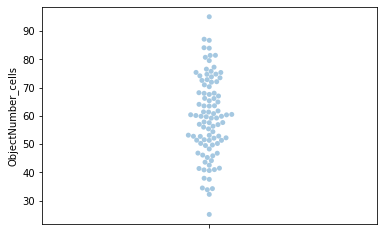

In [27]:
sns.swarmplot(y=dfDMSO_mean["ObjectNumber_cells"], x=['']*len(dfDMSO_mean), alpha=0.4)
plt.show()

In [28]:
print(dfDMSO["ObjectNumber_cells"].std())

24.889084859714107